# 02 Linear Functions

<img src="figs/02_affine_only.png" alt="Drawing" width=450px/>

<img src="figs/02_regression.png" alt="Drawing" width=600px/>

#### Unit 1: Vectors, Book ILA Ch. 1-5
- 01 Vectors
- **_02 Linear Functions_**
- 03 Norms and Distances
- 04 Clustering
- 05 Linear Independence

#### Unit 2: Matrices, Book ILA Ch. 6-11 + Book IMC Ch. 2
#### Unit 3: Least Squares, Book ILA Ch. 12-14 + Book IMC Ch. 8
#### Unit 4: Eigen-decomposition, Book IMC Ch. 10, 12, 19

# Outline: 02 Linear Functions

- [Linear and affine functions](#sec-laf)
- [Taylor approximation](#sec-ta)
- [Regression model](#sec-rm)

<a id="sec-laf"></a>

# Outline: 02 Linear Functions

- **[Linear and affine functions](#sec-laf)**
- [Taylor approximation](#sec-ta)
- [Regression model](#sec-rm)

# Superposition and linear functions

$\color{#EF5645}{\text{Notation}}$: The notation $f:\mathbb{R}^n \rightarrow \mathbb{R}$ means $f$ is a function mapping $n$-vectors to numbers.

$\color{#EF5645}{\text{Definition}}$: We say that $f$ satistifies the superposition property if:

$$f(\alpha x + \beta y) = \alpha f(x) + \beta f(y)$$

holds for all scalars $\alpha, \beta$ and all $n$-vectors $x, y$.

$\color{#EF5645}{\text{Definition}}$: A function that satisfies superposition is called linear.

# Example: the inner product function

$\color{#EF5645}{\text{Definition}}$: For $a$ an $n$-vector, the inner product function is defined as

$$f(x) = a^Tx = a_1x_1 + ... + a_{n}x_{n}.$$
We see that $f(x)$ is a weighted sum of the entries of $x$.


$\color{#047C91}{\text{Exercise}}$: Show that the inner product function is linear.

$\color{#003660}{\text{In Python}}$:

In [2]:
import numpy as np

a = np.array([-2, 0, 1, -3])
f = lambda x: np.inner(a, x); f

<function __main__.<lambda>(x)>

In [3]:
x, y = np.array([2, 2, -1, 1]), np.array([0, 1, -1, 0])
alpha, beta = 1.5, -3.7

In [5]:
lhs, rhs = f(alpha * x + beta * y), alpha * f(x) + beta * f(y)
lhs, rhs

(-8.3, -8.3)

# All linear functions are inner product functions

$\color{#6D7D33}{\text{Proposition}}$:
- If $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is linear,
- Then $f$ can be expressed as $f(x) = a^T x$ for some $n$-vector $a$.
Specifically, $a$ is given by $a_i = f(e_i)$ for $i$ in $\{1, ..., n\}$ where $e_i$ is the one-hot vector with entry 1 at $i$.

$\color{#047C91}{\text{Exercise}}$: If $f(x) = a^T x$, show that $a_i = f(e_i)$.

$\color{#003660}{\text{In Python}}$:

In [6]:
a = np.array([-2, 0, 1, -3])
f = lambda x: np.inner(a, x)

e0 = np.array([1, 0, 0, 0])
f(e0)

-2

# Affine functions

$\color{#EF5645}{\text{Definition}}$: A function that is linear plus a constant is called affine. Its general form is:

$$f(x) = a^Tx+b \quad \text{with $a$ an $n$-vector and $b$ a scalar}$$

$\color{#6D7D33}{\text{Proposition}}$:
 A function $f:\mathbb{R}^n \rightarrow \mathbb{R}$ is affine if and only if:

$$f(\alpha x + \beta y) = \alpha f(x) + \beta f(y)$$
for all scalars $\alpha, \beta$ with $\alpha + \beta = 1$ and all $n$-vectors $x, y$.

# Linear versus affine functions

In this plot, $f$ is linear and $g$ is affine, not linear
<center><img src="figs/02_linear_vs_affine.jpg" alt="Drawing" width=750px/></center>
😱 Sometimes people refer to affine functions as linear.

<a class="anchor" id="sec-ta"></a>

# Outline: Linear Functions

- [Linear and affine functions](#sec-laf)
- **[Taylor approximation](#sec-ta)**
- [Regression model](#sec-rm)

# Gradient of a function

$\color{#EF5645}{\text{Definition}}$: The gradient of $f$ at the $n$-vector $x$ is defined as the $n$-vector $\nabla f(x)$ as:

$$\nabla f(x) = \left(\frac{\partial f}{\partial x_1}(x), ..., \frac{\partial f}{\partial x_n}(x)\right).$$

where $\frac{\partial}{\partial x_i}$ is the partial derivative of $f$ with respect to the component $i$ of $x$.

$\color{#047C91}{\text{Exercise}}$: Consider $f(x) = x_1 + (x_2 - x_1)^3$ defined for any $2$-vector $x$. Compute the gradient of $f$.

# Gradient of a function

$\color{#047C91}{\text{Example}}$: Consider the function $f : \mathbb{R}^2 \rightarrow \mathbb{R}$.


<center><img src="figs/02_gradient.jpeg" alt="default" style="width: 1000px;"/></center>

The arrows represent the gradient of $f$ at different points in $\mathbb{R}^2$.

# Gradient of a function

$\color{#003660}{\text{In Python}}$, we can use the package `jax` to compute gradients.

In [7]:
import jax

f = lambda x: x[0] + (x[1] - x[0]) ** 3
grad_f = jax.grad(f); 
grad_f(np.array([1., 2.]))

DeviceArray([-2.,  3.], dtype=float32)

$\color{#EF5645}{\text{Remark}}$: There are other packages to automatically compute gradients:
- `autograd`, `pytorch`, `tensorflow`.

<center><img src="figs/02_jax.png" alt="Drawing" width=600px/></center>

# First-order Taylor approximation

$\color{#EF5645}{\text{Definition}}$: Take $f: \mathbb{R}^n \rightarrow \mathbb{R}$. The first-order Taylor approximation of $f$ near the $n$-vector $z$ is

$$\hat{f}(x) = f(z) + \nabla f (z)^T (x - z) = f(z) + \frac{\partial f}{\partial x_1}(z) (x_1 - z_1) + ... + \frac{\partial f}{\partial x_n}(z) (x_n - z_n).$$

$\color{#6D7D33}{\text{Properties}}$:
- $\hat{f}(z) = f(z)$, i.e. equality at $z$.
- $\hat{f}(x)$ is very close to $f(z)$ when $x$ is very close to $z$.

# First-order Taylor approximation

<center><img src="figs/02_taylor.jpg" alt="Drawing" width=500px/></center>

- The first-order Taylor approximation provides an affine approximation _near $z$_ to a function that is not affine.
- 😱 This is a good approximation of $f$ only if $x$ is near $z$.

<a id="sec-rm"></a>

# Outline: Linear Functions

- [Linear and affine functions](#sec-laf)
- [Taylor approximation](#sec-ta)
- **[Regression model](#sec-rm)**

# Regression

$\color{#EF5645}{\text{Definition}}$: A linear regression model is the affine function of $x$ defined as
$$\hat y = x^Tw + b$$
where:
- $x$ is an $n$-vector, called a _feature_ or _input_ vector,
- the elements $x_i$'s of $x$ are called _regressors_,
- the $n$-vector $w$ is called _weight vector_,
- the scalar $b$ is called _offset_ or _intercept_ or _bias_,
- the scalar $\hat y$ is called _prediction_ --- of some actual _outcome_ $y$.

# Example: House prices

$\color{#047C91}{\text{Example}}$: Model of house prices:
- Outcome of interest is $y$, selling price of house in \$1000, in some location, over some period of time.
- Available regressors are $x$ = (house area, # bedrooms), where house area is in 1000 sq.ft.
- We are given a regression model with weight vector and offset as:

$$w = (148.73, −18.85), b = 54.40$$

If we are given input regressors for different houses, we can use the regression model to make predictions on their prices.

We use the regression function to return predictions for each house based on beds and area.

In [8]:
w, b = np.array([148.73, -18.85]), 54.40
y_hat = lambda x: np.inner(x, w) + b

x_area, x_beds = 0.846, 1
y_hat_price = y_hat(np.array([x_area, x_beds])); y_hat_price

161.37557999999999

$\color{#003660}{\text{In Python}}$, we evaluate how our model compares to observed data stored in a csv. We use the package `pandas` to load data from a `.csv`.

In [9]:
import pandas as pd

data = pd.read_csv("data/02_houses.csv")

In [11]:
y_price = data["price"]; 
x_area = data["area"]; x_beds = data["beds"]
y_hat_price = np.array([w[0] * x_area + w[1] * x_beds]) + b 

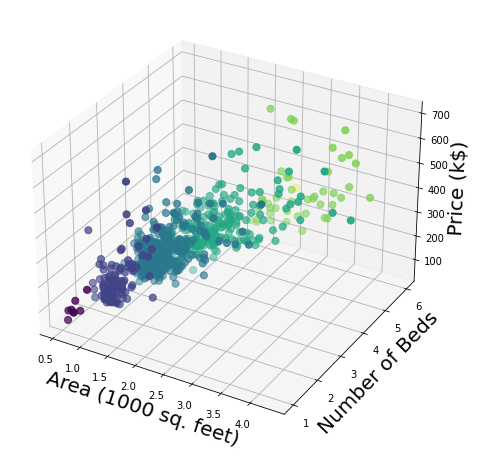

In [14]:
import matplotlib.pyplot as plt
fg = plt.figure(figsize=(8, 8)); ax = fg.add_subplot(projection='3d')
ax.scatter(x_area, x_beds, y_price, c=x_beds, s=50)
ax.set_xlabel("Area (1000 sq. feet)", fontsize=20) 
ax.set_ylabel("Number of Beds", fontsize=20) 
ax.set_zlabel("Price (k$)", fontsize=20);

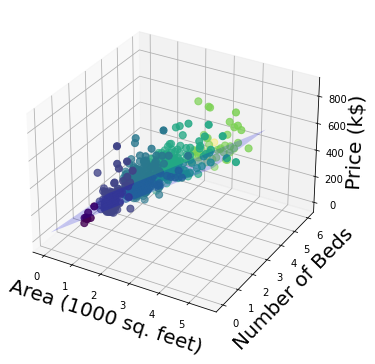

In [17]:
fg = plt.figure(figsize=(6, 6)); ax = fg.add_subplot(projection='3d')
ax.scatter(x_area, x_beds, y_price, c=x_beds, s=50)
ax.set_xlabel("Area (1000 sq. feet)", fontsize=20); ax.set_ylabel("Number of Beds", fontsize=20); ax.set_zlabel("Price (k$)", fontsize=20);

x_beds_grid = np.arange(0, 6, 0.5); x_area_grid = np.arange(0, 4, 0.5)
X, Y = np.meshgrid(x_beds_grid, x_area_grid)
zs = np.array(y_hat(np.array([np.ravel(X), np.ravel(Y)]).T));
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z, alpha=0.2, color="blue"); plt.show();

# Conclusion: Linear Functions

- [Linear and affine functions](#sec-laf)
- [Taylor approximation](#sec-ta)
- [Regression model](#sec-rm)

# Resources

- Ch. 2 of ILA